<a href="https://colab.research.google.com/github/diegoaramirez-glitch/python_principiantes/blob/main/Proyecto_final_DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FINAL PYTHON** Diego A. Ramírez S.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.2/686.2 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 13.9 MB/s eta 0:00:00
  Created wheel for detritalpy: filename=detritalpy-1.4.3-py3-none-any.whl size=88962 sha256=810103d507f66ccdcf3c39094f36325c1e1888a3a6af43ce33514053f25ec1b1
  Stored in directory: /root/.cache/pip/wheels/26/33/69/63bed8dc32b9ad394f567e55519b441ff599893f848b767223
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65860 sha256=1d960533c61943a8b8c3994f9ac73d0a3c97c18b98ce497823bb5b50fee395d8
  Stored in directory: /root/.cache/pip/wheels/83/ee/f2/65cecfd948f1429ead035fd6d56bc6bd6574a636ddc4d65cbd
  Created wheel for vincent


Menú Principal:
1. Cargar datos (Obligatorio)
2. Convertir Coordenadas
3. Localizar en mapa geográfico
4. Localizar en mapa geológico
5. Análisis Detritalpy
6. Salir



Menú Principal:
1. Cargar datos (Obligatorio)
2. Convertir Coordenadas
3. Localizar en mapa geográfico
4. Localizar en mapa geológico
5. Análisis Detritalpy
6. Salir

Submenú Análisis Detritalpy:
1. Seleccionar muestras (obligatorio)
2. Graficar muestras usadas en el análisis
3. Graficar diagramas de distribución
4. Graficar MDS
5. Volver al menú principal
Muestras seleccionadas y datos preparados para Detritalpy.

Submenú Análisis Detritalpy:
1. Seleccionar muestras (obligatorio)
2. Graficar muestras usadas en el análisis
3. Graficar diagramas de distribución
4. Graficar MDS
5. Volver al menú principal
Final stress:  0.0526995501465692


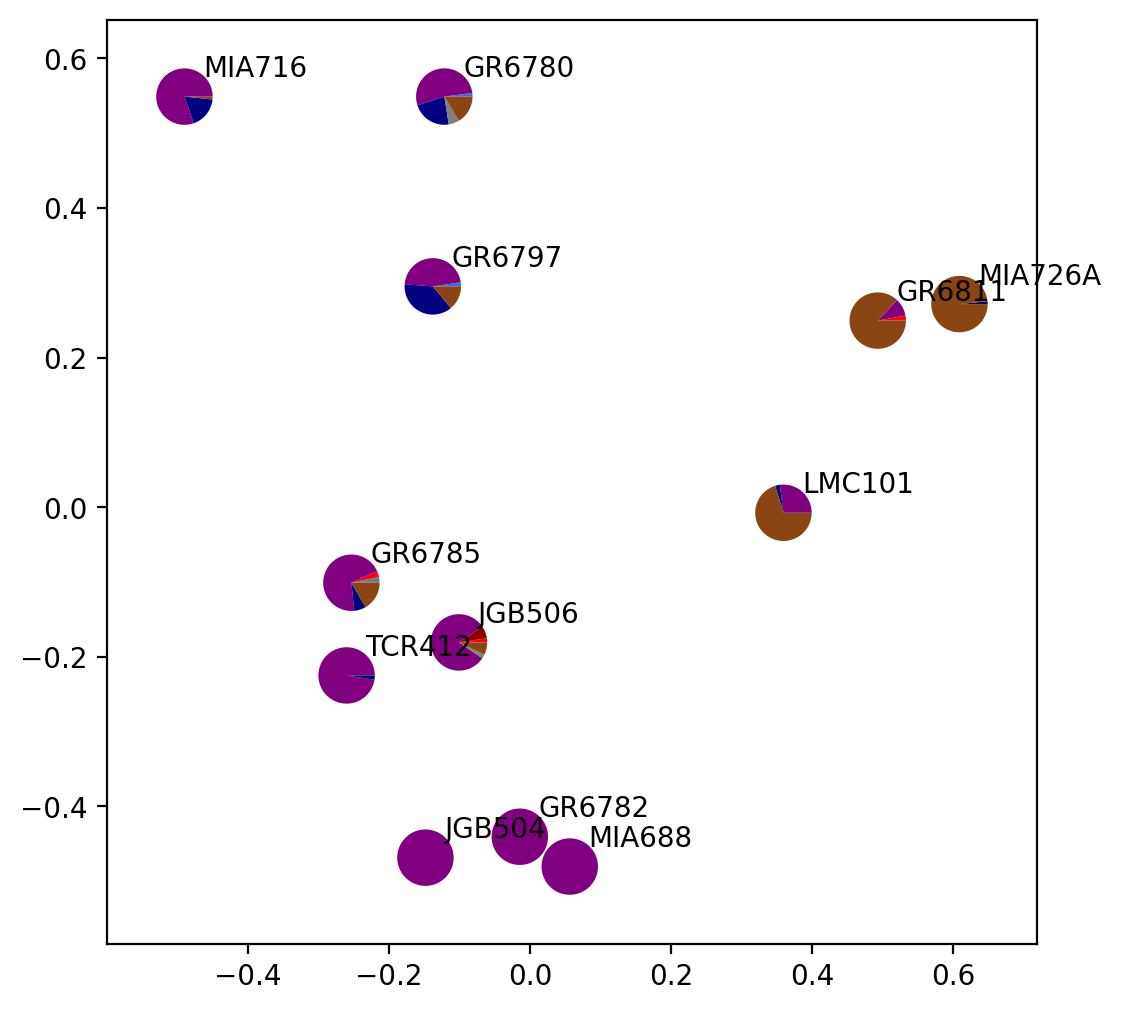


Submenú Análisis Detritalpy:
1. Seleccionar muestras (obligatorio)
2. Graficar muestras usadas en el análisis
3. Graficar diagramas de distribución
4. Graficar MDS
5. Volver al menú principal


In [ ]:
#BLOQUE 1: INSTALAR LIBRERIAS

!pip install pyproj pandas openpyxl
!pip install folium
!pip install detritalpy
!pip install detritalpy --upgrade
!pip install vincent

#BLOQUE 2: IMPORTAR LIBRERIAS

#Importar para convertir coordenadas
import pandas as pd
from pyproj import Transformer
from openpyxl import load_workbook
#Importar para localización geográfica y geológica de las muestras
import folium
from shapely.geometry import Point
from IPython.display import display
#Importar para usar detritalpy
import detritalpy
import detritalpy.detritalFuncs as dFunc
import pathlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For improving matplotlib figure resolution
matplotlib.rcParams['pdf.fonttype'] = 42 # For allowing preservation of fonts upon importing into Adobe Illustrator
matplotlib.rcParams['ps.fonttype'] = 42
print('detritalPy version: ',detritalpy.__version__)

# BLOQUE 3: FUNCIONES

## OPCION 1: CARGAR DATOS =======================================================================================================================
main_df = None
main_byid_df = None
samples_df = None
analyses_df = None

def cargar_datos():
  global main_df, main_byid_df, samples_df, analyses_df # Declare global variables to modify them within the function
  excel_path = input("Ingresa la ruta del archivo Excel: ")
  dataToLoad = [excel_path]

  main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(dataToLoad, mainSheet='Samples', dataSheet='ZrUPb', ID_col = 'Sample_ID')
  if main_df is not None:
    print("Datos cargados exitosamente.")
  else:
    print("Error al cargar los datos.")


## OPCION 2: CONVERTIR COORDENADAS===============================================================================================================

def convertir_coordenadas():
# Define los sistemas de coordenadas
  inProj = 'epsg:3116'  # Origen Bogotá (MAGNA-SIRGAS)
  outProj = 'epsg:4326' # Sistema Geográfico (WGS84)

# Crea el objeto Transformer
  try:
    transformer = Transformer.from_crs(inProj, outProj, always_xy=True)
  except Exception as e:
    print(f"Error creating transformer: {e}")
    return


# Lee los datos del archivo Excel
  global main_df # Access the global main_df

  if main_df is None: # Check if main_df has been loaded
    print("Error: Debes cargar los datos primero (Opción 1).")
    return

  if 'x' not in main_df.columns or 'y' not in main_df.columns:
      print("Error: Las columnas 'x' o 'y' no se encuentran en el DataFrame cargado.")
      return

# Extrae las columnas de coordenadas planas
  x = main_df['x'].values  # Columna con las coordenadas X
  y = main_df['y'].values  # Columna con las coordenadas Y

# Transforma las coordenadas
  try:
    longitude, latitude = transformer.transform(x, y)
  except Exception as e:
      print(f"Error transforming coordinates: {e}")
      return


# Agrega las coordenadas geográficas al DataFrame
  main_df['Longitude'] = longitude
  main_df['Latitude'] = latitude

# Load the original Excel file using openpyxl
  try:
    book = load_workbook('/content/drive/MyDrive/Detritalpy/ExampleDataset_SNSM 2020.xlsx')

# Get the 'Samples' sheet
    samples_sheet = book['Samples']

# Iterate through the rows and update Latitude and Longitude
    for index, row in main_df.iterrows():
        # Assuming the header is in the first row (row 1), data starts from row 2
        # Adjust column index if necessary (openpyxl is 1-based index)
        lat_col_index = main_df.columns.get_loc('Latitude') + 1
        lon_col_index = main_df.columns.get_loc('Longitude') + 1
        samples_sheet.cell(row=index + 2, column=lat_col_index, value=row['Latitude'])
        samples_sheet.cell(row=index + 2, column=lon_col_index, value=row['Longitude'])

# Save the changes
    book.save('/content/drive/MyDrive/Detritalpy/ExampleDataset_SNSM 2020.xlsx')
    print("Coordenadas geográficas agregadas a la hoja 'Samples'")

  except FileNotFoundError:
    print("Error: Asegúrate de que el archivo Excel exista en la ruta especificada.")
  except Exception as e:
    print(f"Error saving the Excel file: {e}")


## OPCION 3: LOCALIZAR MUESTRAS EN MAPA GEOGRÁFICO ===================================================================================================================
### MAPA GEOGRAFICO ###

# Crea una lista de coordenadas (latitud, longitud) a partir del DataFrame
def localizar_geografico():
  global main_df

  if main_df is None: # Check if main_df has been loaded
        print("Error: Debes cargar los datos primero (Opción 1).")
        return

  if 'Latitude' not in main_df.columns or 'Longitude' not in main_df.columns:
    print("Error: Las columnas 'Latitude' o 'Longitude' no se encuentran en el DataFrame. Asegúrate de haber convertido las coordenadas (Opción 2).")
    return


  locations = list(zip(main_df['Latitude'], main_df['Longitude']))

  center_lat = main_df['Latitude'].mean()
  center_lon = main_df['Longitude'].mean()

  m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

# Agrega los puntos al mapa
  for location in locations:
      folium.Marker(location=location, popup="Sample_ID").add_to(m)

# Muestra el mapa en Colab
  display(m)

## OPCION 4: LOCALIZAR MUESTRAS EN MAPA GEOLÓGICO ===================================================================================================================
### MAPA GEOLOGICO ###

# Crea el mapa
def localizar_geologico():
  global main_df

  if main_df is None: # Check if main_df has been loaded
        print("Error: Debes cargar los datos primero (Opción 1).")
        return

  if 'Latitude' not in main_df.columns or 'Longitude' not in main_df.columns:
    print("Error: Las columnas 'Latitude' o 'Longitude' no se encuentran en el DataFrame. Asegúrate de haber convertido las coordenadas (Opción 2).")
    return


  center_lat = main_df['Latitude'].mean()
  center_lon = main_df['Longitude'].mean()

  m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

# Agrega el mapa base geológico de Macrostrat
  folium.TileLayer(
      tiles='https://tiles.macrostrat.org/carto/{z}/{x}/{y}.png',
      attr='Macrostrat',
      name='Mapa Geológico',
      overlay=True,
      control=True
  ).add_to(m)

# Agrega los puntos con Sample_ID en el popup
  for index, row in main_df.iterrows():
      folium.Marker(
          location=[row['Latitude'], row['Longitude']],
          popup=row['Sample_ID']
      ).add_to(m)

  display(m)

# OPCION 5: ANALISIS DETRITALPY =====================================================================================================================
# Initialize sampleList, ages, errors, numGrains, labels globally
sampleList = None
ages = None
errors = None
numGrains = None
labels = None

# Seleccionar muestras -------------------------------------------------------------------------------------------------------------------------------

def muestras_detritalpy():
  global sampleList, ages, errors, numGrains, labels, main_df, main_byid_df # Declare as global to modify them
  # Initialize and populate sampleList inside the function
  if main_df is None or main_byid_df is None:
    print("Error: Debes cargar los datos primero (Opción 1).")
    return
  sampleList = main_df['Sample_ID'].unique().tolist()

  sigma = '2sigma' # Uncertainty level of U-Pb dates, options: '1sigma' or '2sigma'

  try:
      ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma=sigma)
      print("Muestras seleccionadas y datos preparados para Detritalpy.")
  except Exception as e:
      print(f"Error preparing data for Detritalpy: {e}")
      return

# Return the populated sampleList
  return sampleList, ages, errors, numGrains, labels

# Diagrama de número de muestras -----------------------------------------------------------------------------------------------------------------------
def plot_muestras_detritalpy():
  global main_byid_df
  if main_byid_df is None:
    print("Error: Debes cargar los datos primero (Opción 1).")
    return

  try:
    dFunc.plotSampleDist(main_byid_df, numBins=25)
    plt.draw()
    plt.pause(2)
  except Exception as e:
      print(f"Error plotting sample distribution: {e}")


# Graficar diagramas de distribución -------------------------------------------
def distribucion_detritalpy():
  global ages, errors, numGrains, labels # Declare variables as global to access them

  # Check if data has been loaded and prepared
  if ages is None or errors is None or numGrains is None or labels is None:
    print("Error: Debes seleccionar las muestras primero (Opción 5.1).")
    return

# Enter plot options below
  whatToPlot = 'both' # Options: cumulative, relative, or both
  separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
  x1 = 0
  x2 = 2000
  plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
  w = 10 # width of the plot
  c = 4 # height of CDF panel
  h = 5 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

# Specify the interval (Myr) over which distributions are calculated
  xdif = 1 # Note: an interval of 1 Myr is recommended

# Cumulative distribution options
  plotCDF = True # Plot the CDF discretized at xdif interval
  plotCPDP = False # Plot the cumulative PDP
  plotCKDE = False # Plot the cumulative KDE
  plotDKW = False # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
  normPlots = False # Will normalize the PDP/KDE if equals True (if separateSubplots is True)

  plotKDE = False # Set to True if want to plot KDE
  colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
  colorKDEbyAge = True # Will color KDE according to age populations if set to True
  bw = 3 # Specify the KDE bandwidth. Options are 'ISJ', 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr; e.g., bw = 3)
  bw_x = None # X-axis location of bandwidth split (only used if multiple KDE values are specified in a list). Set to None if not using a split bandwidth.

  plotPDP = True # Set to True if want to plot PDP
  colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
  colorPDPbyAge = True # Will color PDP according to age populations if set to True

  plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

  plotHist = True # Set to True to plot a histogram (only available when separateSubplots is True)
  b = 5 # Specify the histogram bin size (Myr)

  plotPIE = True # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
  agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
  agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

# Alternative way of specifying age bins
  agebins = [[0,23],[23,65],[65,85],[85,100],[100,135],[135,200],[200,300],[300,500],[500,4500]]
  agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

  plotAgePeaks = False # Will identify and plot age peaks
  agePeakOptions = ['KDE', 0.05, 5, 2, True] # [distType, threshold, minDist, minPeakSize, labels]

# Plot PDP or KDE distributions as a heat map
  plotHeatMap = False
  heatMapType = 'KDE' # Options: 'PDP' or 'KDE'
  heatMap = 'inferno_r'

  try:
    fig = dFunc.plotAll(sampleList, ages, errors, numGrains, labels, whatToPlot, separateSubplots, plotCDF, plotCPDP, plotCKDE,
                        plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar,
                        plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                        CDFlw=3, KDElw=1, PDPlw=1, bw_x=bw_x, plotHeatMap=plotHeatMap, heatMapType=heatMapType, heatMap=heatMap)
    plt.draw()
    plt.pause(2)
  except Exception as e:
      print(f"Error plotting distributions: {e}")


# Graficar MDS -----------------------------------------------------------------
def mds_detritalpy():
  global ages, errors, labels, sampleList # Declare variables as global to access them

  if ages is None or errors is None or labels is None or sampleList is None:
      print("Error: Debes seleccionar las muestras primero (Opción 5.1).")
      return

  try:
      model = dFunc.MDS_class(ages, errors, labels, sampleList, metric=False, criteria='Vmax', bw=3, n_init='metric',
                            max_iter=1000, x1=0, x2=4500, xdif=1, min_dim=1, max_dim=3, dim=2)

# Sharman et al. 2015 scheme
      agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
      agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

      model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True,
                    plotPie=True, pieType='Age', pieSize=0.04, agebins=agebins, agebinsc=agebinsc, equalAspect=False)
      plt.draw()
      plt.pause(2)
  except Exception as e:
    print(f"Error plotting MDS: {e}")


# ========================================= Menu principal =========================================================

def main():
    while True:
        print("\nMenú Principal:")
        print("1. Cargar datos (Obligatorio)")
        print("2. Convertir Coordenadas")
        print("3. Localizar en mapa geográfico")
        print("4. Localizar en mapa geológico")
        print("5. Análisis Detritalpy")
        print("6. Salir")

        opcion = input("Selecciona una opción: ")

        if opcion == '1':
            cargar_datos()
        elif opcion == '2':
            convertir_coordenadas()
        elif opcion == '3':
            localizar_geografico()
        elif opcion == '4':
            localizar_geologico()
        elif opcion == '5':
            while True:
                print("\nSubmenú Análisis Detritalpy:")
                print("1. Seleccionar muestras (obligatorio)")
                print("2. Graficar muestras usadas en el análisis")
                print("3. Graficar diagramas de distribución")
                print("4. Graficar MDS")
                print("5. Volver al menú principal")

                sub_opcion = input("Selecciona una opción: ")
                if sub_opcion == '1':
                    muestras_detritalpy()
                elif sub_opcion == '2':
                    plot_muestras_detritalpy()
                elif sub_opcion == '3':
                    distribucion_detritalpy()
                elif sub_opcion == '4':
                    mds_detritalpy()
                elif sub_opcion == '5':
                    break
                else:
                    print("Opción inválida. Intenta de nuevo.")
        elif opcion == '6':
            break
        else:
            print("Opción inválida. Intenta de nuevo.")

#BLOQUE 4: CUERPO DEL CODIGO
main()